In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("rna_tissue_consensus.tsv.zip", sep="\t") ### Downloaded from Human Protein Atlas (RNA consensus tissue gene data: https://www.proteinatlas.org/about/download)

In [3]:
genes = open('hg38_QPs_genes_ENSG.txt').read().splitlines()
sub_df = df[df.Gene.isin(genes)].reset_index(drop=True)

In [5]:
tissue_medians = {}
for tissue in list(set(sub_df.Tissue)):
    tissue_df = sub_df[sub_df.Tissue == tissue]
    median = np.median(tissue_df.nTPM)
    tissue_medians[tissue] = median
sorted_tissue_medians = dict(sorted(tissue_medians.items(), key=lambda x: x[1]))

In [6]:
plotD = {'Tissue':[], 'nTPM':[]}

for tissue in sorted_tissue_medians.keys():
    tissue_df = sub_df[sub_df.Tissue == tissue]
    for row in tissue_df.index:
        tissue = sub_df.loc[row, 'Tissue']
        nTPM = sub_df.loc[row, 'nTPM']
        plotD['Tissue'].append(tissue)
        plotD['nTPM'].append(nTPM)

/Users/candacechan/opt/miniconda3/envs/bc/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


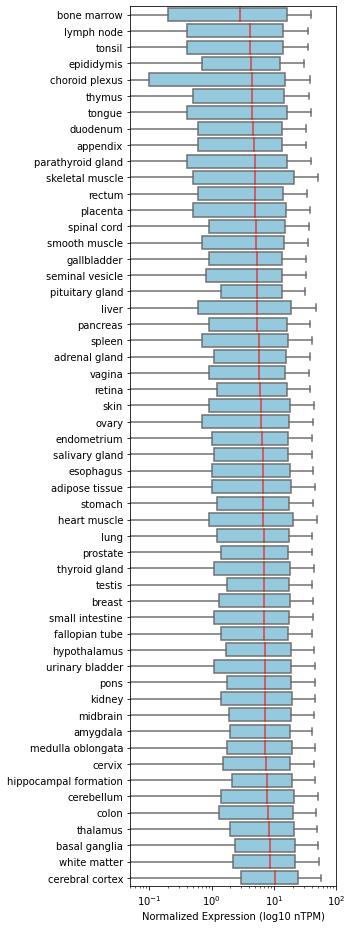

In [7]:
plt.rcParams['figure.figsize']=(5,13)
sns.boxplot(data=plotD, x='nTPM', y='Tissue', fliersize=0, color='skyblue', medianprops=dict(color="red", alpha=0.7))
plt.xscale('log')
plt.xlim(0, 100)
plt.xlabel("Normalized Expression (log10 nTPM)")
plt.tight_layout()
plt.show()
plt.close()